In [517]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from itertools import izip

palette = sns.color_palette("hls", 8)

REGIONS = {
    'noncoding_exon':palette[0],
    '3utr':palette[1],
    '5utr':palette[2],
    'intron':palette[3],
    'noncoding_intron':palette[4],
    'CDS':palette[5],
    'intergenic':palette[6],
    '5utr|3utr':palette[7]
}

In [492]:
def split_single_cols(df, col, sep='|'):
    """
    Splits a df['col'] into two separated by 'sep'
    ie. -0.9201|0.00000 -> -0.9201  0.00000
    """
    df["{} l2fc".format(col.split(sep)[1])], \
    df["{} l10p".format(col.split(sep)[1])] = zip(
        *df[col].map(lambda x: x.split(sep))
    )
    return df


def split_l2fcwithpval_enr(df, discard = True):
    """
    Splits a dataframe into its l2fc and log10 pvalue
    ie. -0.9201|0.00000 -> -0.9201  0.00000
    
    Parameters
    ----------
    df : pandas.DataFrame
        dataframe of l2fcwithpval_enr file
    discard : bool
        if True, discard the original column.
        if False, keep the original column.

    Returns
    -------
    df : pandas.DataFrame
    """

    for col in df.columns:
        df = split_single_cols(df, col)
        if discard:
            del df[col]
    return df


def scatter_matrix(ip_l2fc, inp_reads_by_loc):
    """
    Inner joins the ip l2fc and input reads by loc files
    and builds a dataframe containing: input reads by location, 
    ip 
    Parameters
    ----------
    ip_l2fc : basestring
        "IP*_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv"
    inp_reads_by_loc : basestring
        "INPUT*reads_by_loc.csv"

    Returns
    -------
    x : pandas.DataFrame
        intersection of fold-enrichment and input reads covering each gene.
    """

    plot_x = pd.read_table(
        inp_reads_by_loc,
        index_col=0,
    )

    plot_y = read_l2fcwithpval_enr(ip_l2fc)

    x = pd.merge(plot_x, plot_y, how='inner', left_index=True,
                 right_index=True)
    return x

def plot_ip_foldchange_over_input_reads(
        ip_l2fc, inp_reads_by_loc,
        out_file,
        field_list=REGIONS,
        alpha=0.3
):
    """
    Plots the region-based analysis of genes enriched in IP over
     reads in size-matched input. This is the same figure used in Figure2b
     of Ann's IMP paper.

    Parameters
    ----------
    ip_l2fc : basestring
    inp_reads_by_loc : basestring
    out_file : basestring
        output file
    field_list : dict
        dictionary of {region: color} to plot
    Returns
    -------

    """
    df = p.scatter_matrix(ip_l2fc, inp_reads_by_loc)

    f, ax = plt.subplots(figsize=(10, 10))
    for region, color in field_list.iteritems():
        if region in df.columns:
            ax.scatter(
                np.log2(df[region] + 1),
                df["{} l2fc".format(region)],
                color=color,
                alpha=alpha
            )
        else:
            print("region {} not found in dataframe matrix".format(
                region
            ))
    ax.set_title("Region-based analysis of genes enriched")
    ax.set_xlabel("Reads in SMInput (log2)")
    ax.set_ylabel("Fold Enrichment (log2)")
    plt.legend()
    plt.savefig(out_file)

In [12]:
ip_l2fc = '/home/bay001/projects/codebase/bfx/pyscripts/clipseq/data/204_RBFOX2_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'
inp_reads_by_loc = '/home/bay001/projects/codebase/bfx/pyscripts/clipseq/data/RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam.reads_by_loc.csv'

In [493]:
def plot_ip_foldchange_over_input_reads(
        ip_l2fc, inp_reads_by_loc,
        ax=None,
        field_list=REGIONS,
        alpha=0.3
):
    """
    Plots the region-based analysis of genes enriched in IP over
     reads in size-matched input. This is the same figure used in Figure2b
     of Ann's IMP paper.

    Parameters
    ----------
    ip_l2fc : basestring
    inp_reads_by_loc : basestring
    field_list : dict
        dictionary of {region: color} to plot
    Returns
    -------
    :param ip_l2fc: 
    :param inp_reads_by_loc: 
    :param alpha: 
    :param ax: 

    """
    df = scatter_matrix(ip_l2fc, inp_reads_by_loc)

    if ax is None:
        ax = plt.gca()
    for region, color in field_list.iteritems():
        if region in df.columns:
            ax.scatter(
                np.log2(df[region] + 1),
                df["{} l2fc".format(region)],
                color=color,
                alpha=alpha
            )
        else:
            print("region {} not found in dataframe matrix".format(
                region
            ))
    ax.set_title("Region-based analysis of genes enriched")
    ax.set_xlabel("Reads in SMInput (log2)")
    ax.set_ylabel("Fold Enrichment (log2)")
    ax.legend()
    return ax

region 5utr_and_3utr not found in dataframe matrix


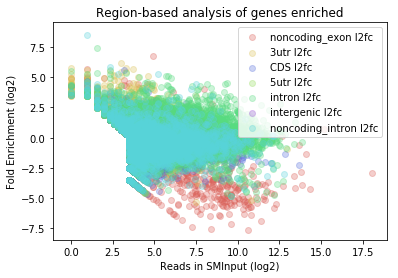

In [494]:
plot_ip_foldchange_over_input_reads(
    ip_l2fc, inp_reads_by_loc
)

In [495]:
scatter_matrix(ip_l2fc, inp_reads_by_loc)

,CDS,5utr,3utr,5utr|3utr,intron,intergenic,noncoding_exon,noncoding_intron,CDS l2fc,CDS l10p,...,3utr l2fc,3utr l10p,intron l2fc,intron l10p,intergenic l2fc,intergenic l10p,noncoding_exon l2fc,noncoding_exon l10p,noncoding_intron l2fc,noncoding_intron l10p
ENSG,,,,,,,,,,,,,,,,,,,,,
ENSG00000148411.3,14,4,99,0,571,0,0,0,-0.0481,0.00000,...,1.1419,10.84509,1.0305,46.89103,NaN,0.0,NaN,0.00000,NaN,0.00000
ENSG00000273045.1,0,1,0,0,5,0,0,0,NaN,0.00000,...,NaN,0.00000,NaN,0.00000,NaN,0.0,NaN,0.00000,NaN,0.00000
ENSG00000174093.6,5,4,1,0,244,0,0,1,NaN,0.00000,...,NaN,0.00000,-0.8885,0.00000,NaN,0.0,NaN,0.00000,NaN,1.13565
ENSG00000235703.1,0,0,0,0,0,0,36,225,NaN,0.00000,...,NaN,0.00000,NaN,0.00000,NaN,0.0,1.0919,3.85090,0.6680,7.55854
ENSG00000116205.6,1,0,8,0,30,0,0,6,NaN,0.00000,...,1.0223,0.87956,-1.3540,0.00000,NaN,0.0,NaN,0.00000,NaN,0.12505
ENSG00000152795.13,85,7,32,0,62,0,0,0,-0.7496,0.00000,...,-0.1934,0.00000,0.7311,2.81759,NaN,0.0,NaN,0.00000,NaN,0.00000
ENSG00000122223.8,0,0,0,0,1,0,0,0,NaN,0.00000,...,NaN,0.00000,NaN,0.00000,NaN,0.0,NaN,0.00000,NaN,0.00000
ENSG00000077152.5,2,0,0,0,5,0,0,0,NaN,0.00000,...,NaN,0.00000,NaN,0.26683,NaN,0.0,NaN,0.00000,NaN,0.00000
ENSG00000106993.7,2,1,0,0,46,0,0,0,NaN,0.00000,...,NaN,0.00000,-1.4232,0.00000,NaN,0.0,NaN,0.00000,NaN,0.00000


# test motif function

In [ ]:
def plot_zscores(rep1_scores, rep2_scores, highlight=[], label='all 6mers',
                 color=palette[4], highlight_color=palette[5]):
    """
    
    :param rep1_scores: pandas.DataFrame
        table of zscore enrichments (indexed by Kmer)
    :param rep2_scores: pandas.DataFrame
        table of zscore enrichments (indexed by Kmer)
    :param highlight: 
        any Kmer you would like to highlight in the plot.
    :return ax: ax
    """
    f, ax = plt.subplots()

    merged = pd.merge(
        rep1_scores,
        rep2_scores,
        how='left',
        left_index=True,
        right_index=True
    )
    merged.columns = ['rep1', 'rep2']
    ax.scatter(
        merged['rep1'], merged['rep2'], color=color, label=label
    )
    if len(highlight) > 0:  # we have some kmers of interest to highlight
        for kmer in highlight:
            ax.scatter(
                merged['rep1'].loc[kmer], merged['rep2'].loc[kmer],
                color=highlight_color
            )

        labels = merged.loc[highlight].index
        print(labels)
        for label, x, y in zip(labels, merged['rep1'].loc[labels], merged['rep2'].loc[labels]):
            plt.annotate(
                label,
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
            )
    ax.set_xlabel('Z-score ({})'.format(rep1_scores.columns[0]))
    ax.set_ylabel('Z-score ({})'.format(rep2_scores.columns[0]))
    plt.legend()
    return ax

In [ ]:
import cPickle as pickle
p1 = '/projects/ps-yeolab3/bay001/tbos/clip_analysis_output/APO_01_01.basedon_APO_01_01.peaks.l2inputnormnew.bed.compressed.p3.fc3.bed.clip_analysis.pickle'
p2 = '/projects/ps-yeolab3/bay001/tbos/clip_analysis_output/APO_02_01.basedon_APO_02_01.peaks.l2inputnormnew.bed.compressed.p3.fc3.bed.clip_analysis.pickle'
loaded1 = pickle.load(open(p1,'rb'))
loaded2 = pickle.load(open(p2,'rb'))
motif_scores1 = {}
motif_scores2 = {}
for key, value in loaded1['kmer_results']['all'][6].iteritems():
    motif_scores1[key] = value.delta
    motif_scores2[key] = loaded2['kmer_results']['all'][6][key].delta
join1 = pd.DataFrame(motif_scores1,index=['rep1']).T
join2 = pd.DataFrame(motif_scores2,index=['rep2']).T


In [ ]:
plot_zscores(join1, join2, highlight=['ATGTAT', 'TAATGT'])

In [ ]:
def read_kmer_enrichment_from_pickle(pickle_file, region='all', k=6):
    """
    Reads in a pickle file from gabe's clip_analysis script and returns a dataframe
    containing kmers and their enriched z-scores
    
    :param pickle_file: 
    :return: 
    """
    loaded = pickle.load(open(pickle_file, 'rb'))
    df = pd.DataFrame(loaded['kmer_results'][region][k]).T
    df.columns = ['fg','bg','zscore delta']
    return df[['zscore delta']]

In [ ]:
read_kmer_enrichment_from_pickle(p1, k=8)

In [ ]:
loaded = pickle.load(open(p1, 'rb'))

In [ ]:
loaded['kmer_results'].keys()

# test region level enrichment plots

In [472]:
r1 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/A6_01_LUC7L_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'
r2 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/A6_02_LUC7L_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'

In [15]:
def read_l2fcwithpval_enr(fn):
    """
    Reads in a *l2fcwithpval_enr.csv file and returns a dataframe.
    
    :param fn: 
    :return: 
    """
    df = pd.read_table(
        fn,
        index_col=0,
    )
    df = split_l2fcwithpval_enr(df)
    df = df.replace('NaN',np.nan)
    df = df.apply(pd.to_numeric)
    return df

In [482]:
def plot_compare_rbp_enriched_regions(
        l2fc_pval_enr1, l2fc_pval_enr2,
        regions=None,
        equivalent_axis=True,
        drop_all_nans=True,
        ax=None
):
    """
    Plots region enriched values for 2 replicates. 
    Similar to Figure 2CDEF of Ann's IMP paper.

    :param ax: 
    :param l2fc_pval_enr1: basestring
    :param l2fc_pval_enr2: basestring
    :param equivalent_axis: bool
        if True, this will make the figure axes equal to each other.
        This generally makes it easier to see any skews between reps.
    :param regions: list
        List of regions to plot over each other.
        This list needs to match the columns listed in each l2fc_pval_enr file.
    :param drop_all_nans: bool
        if True, drops genes which have NaN values in one or both replicates.
        if False, drops genes which have NaN values in both replicates only, 
        imputing missing values with 0.
    :return ax: 
    """
    df1 = read_l2fcwithpval_enr(l2fc_pval_enr1)
    df2 = read_l2fcwithpval_enr(l2fc_pval_enr2)

    # this drops any nonexisting ENSGs that don't appear in both reps
    merged = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

    # set initial axis limits to be some impossible number.
    min_lim = 1000000
    max_lim = -1
    buf = 1

    # sets default regions:
    if regions is None:
        regions = ['intron', 'CDS', '3utr', '5utr']

    if ax is None:
        ax = plt.gca()
    for region in regions:
        region_df = merged[['{} l2fc_x'.format(region), '{} l2fc_y'.format(region)]]
        region_df.columns = ['rep1', 'rep2']

        # this drops any NaNs present in both ('all') or either ('any') rep.
        how = 'any' if drop_all_nans else 'all'
        region_df.dropna(inplace=True, how=how, subset=['rep1', 'rep2'])

        # gets the correlation for the label
        corr = region_df.corr().iloc[0, 1]

        sns.regplot(
            'rep1', 'rep2', region_df,
            label="{0} - r2: {1:.2f}".format(
                region,
                corr * corr  # r^2
            ),
            ax=ax,
            scatter_kws={'alpha': 0.4},
            truncate=False
        )

        # this ensures that the plot is x=y
        min_clim = min(
            region_df['rep1'].min(), region_df['rep2'].min()
        )
        max_clim = min(
            region_df['rep1'].max(), region_df['rep2'].max()
        )

        if min_clim < min_lim:
            min_lim = min_clim
        if max_clim > max_lim:
            max_lim = max_clim
    # this makes it easier to see any skews from good correlation.
    if equivalent_axis:
        ax.set_xlim(min_lim - buf, max_lim + buf)
        ax.set_ylim(min_lim - buf, max_lim + buf)

    ax.legend()
    return ax

In [17]:
plot_compare_rbp_enriched_regions(r1, r2)

NameError: name 'r1' is not defined

In [ ]:
type(sns.color_palette()[0])

In [ ]:
iris = sns.load_dataset("iris")
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# pilot 2G

In [402]:
import seaborn as sns

def plot_histogram_enriched_regions(
    l2fc_pval_enr, bins=None, 
    xlabel='eCLIP log2 fold-enrichment',
    ylabel='fraction of regions in bin',
    xlim=(-3,3),
    ax=None
):
    """
    """
    if ax is None:
        ax = plt.gca()
    regions = ['CDS','3utr','intron']
    df = read_l2fcwithpval_enr(l2fc_pval_enr)
    for region in regions:
        n, bins = np.histogram(
            df['{} l2fc'.format(region)].dropna(), 
            bins=100, range=xlim
        )
        pdf = [float(b)/sum(n) for b in n]
        ax.bar(range(100), pdf, label=region, alpha=0.4)
        # sns.distplot(
        #     df['{} l2fc'.format(region)].dropna(), 
        #     ax=ax, norm_hist=False, 
        #     label=region # , hist_kws={'density':True}
        # )
    
    # set the x, ylabel
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(0, 100+1, 10.0))

    ax.set_xticklabels(bins[::10])
    ax.legend()
    # return ax

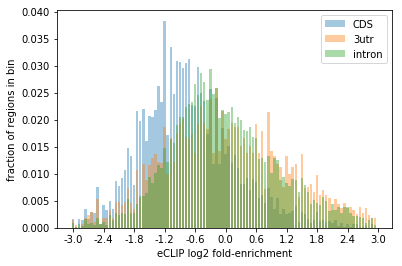

In [237]:
# fig, ax = plt.subplots(figsize=(2,1))
r = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/rbfox2_input_norm/204_RBFOX2_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'

plot_histogram_enriched_regions(r)


In [216]:
bins[::10]

array([-8. , -6.4, -4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8,  6.4,  8. ])

In [179]:
df = read_l2fcwithpval_enr(r)
dx = df['CDS l2fc']
dx.dropna(inplace=True)

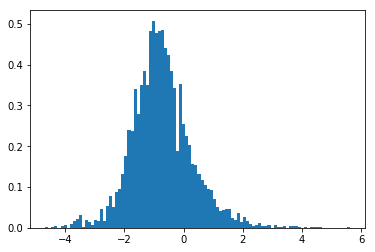

In [148]:
bins1 = plt.hist(dx, density=True, stacked=True, bins=100)

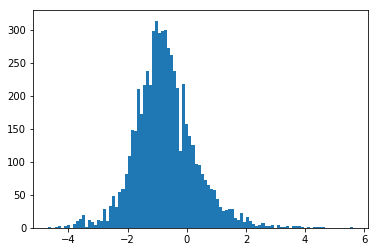

In [158]:
n, bins, patches = plt.hist(dx, density=False, stacked=False, bins=100,)
pdf = [float(b)/sum(n) for b in n]

<Container object of 100 artists>

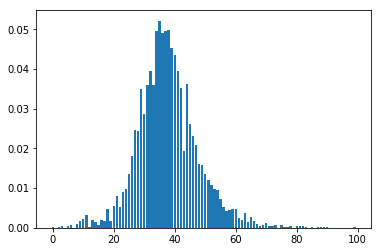

In [159]:
plt.bar(range(100), pdf)

In [160]:
n, bins = np.histogram(dx, bins=100, range=(-8,8))

In [161]:
pdf = [float(b)/sum(n) for b in n]


<Container object of 100 artists>

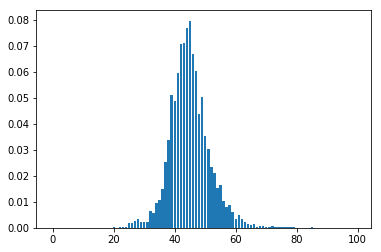

In [162]:
plt.bar(range(100), pdf)

In [241]:
brian = '/home/bay001/projects/nazia_clipseq_20170627/permanent_data/eCLIP-0.1.5/annotated_peaks/DDX5.REP1.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed'
eric = '/home/bay001/projects/codebase/bfx/pyscripts/data/WTV5_02_01.basedon_WTV5_02_01.peaks.l2inputnormnew.bed.compressed.chr7.bed.annotated'

In [505]:
def read_annotated_file(fn, headers=None, src='brian'):
    if src == 'brian':
        headers=[
            'chrom','start','end','l10p','l2fc','strand','geneid',
            'genename','region','alloverlapping'
        ]
        df = pd.read_table(fn, names=headers)
    elif src == 'eric':
        headers=[
            'chrom','start','end','l10p','l2fc',
            'strand','annotation','geneid'
        ]
        df = pd.read_table(fn, names=headers)
        df['region'] = df.apply(return_region_eric, axis=1)
    else:
        assert 'region' in headers
        df = pd.read_table(fn, names=headers)
    return df

def get_counts(lst, headers=None, src='brian'):
    """

    :param lst: list of annotated files
    :return:
    """
    assert len(lst) > 0
    annotated_file = lst[0]
    merged = pd.DataFrame(
        read_annotated_file(annotated_file, headers, src)['region'].value_counts())
    merged.columns = [os.path.basename(annotated_file)]
    for annotated_file in lst[1:]:
        df = pd.DataFrame(
            read_annotated_file(annotated_file, headers, src)['region'].value_counts())
        df.columns = [os.path.basename(annotated_file)]
        merged = pd.merge(merged, df, how='left', left_index=True,
                          right_index=True)
    return merged

def return_region_eric(row):
    """
    Given a row of a inputnormed bedfile, return region
    Row must be in the same format as a line in Eric's
    *.annotated file.

    """
    try:
        if row['annotation'] == 'intergenic':
            return 'intergenic'
        region = row['annotation'].split('|')[0]

        return region
    except Exception as e:
        print(e)
        print(row)
        
def plot_region_distribution(
    df, ax=None
):
    """

    :param ax: 
    :param df: pandas.DataFrame()
        dataframe containing samples (columns) and regions (rows)
        Use peak_parsers.get_counts() to get this dataframe
    :return:
    """
    dfdiv = df / df.sum()
    cumsum_events = dfdiv.cumsum()

    if ax is None:
        ax = plt.gca()

    legend_builder = []
    legend_labels = []
    for region, color in izip(
            reversed(cumsum_events.index),
            sns.color_palette("hls", len(cumsum_events.index)+1)
    ):
        names = np.array(
            ["".join(item) for item in cumsum_events.columns]
        )

        sns.barplot(
            names,
            y=cumsum_events.ix[region], color=color, ax=ax
        )

        legend_builder.append(
            plt.Rectangle((0, 0), .25, .25, fc=color, edgecolor='none')
        )
        legend_labels.append(region)

    sns.despine(ax=ax, left=True)

    ax.set_ylim(0, 1)

    l = ax.legend(legend_builder,
                  legend_labels, loc=1, ncol=1,
                  prop={'size': 12},
                  bbox_to_anchor=(1.4, 0.8))
    l.draw_frame(False)
    [tick.set_rotation(90) for tick in ax.get_xticklabels()]

    ax.set_ylabel("Fraction of Peaks", fontsize=14)
    [tick.set_fontsize(12) for tick in ax.get_xticklabels()]
    ax.set_title(
        "Fraction of Peaks among RBPs"
    )
    return ax

In [246]:
get_counts([brian, brian])

,DDX5.REP1.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed_x,DDX5.REP1.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed_y
intron,2729,2729
CDS,610,610
5utr,605,605
3utr,137,137
noncoding_exon,127,127
noncoding_intron,65,65
intergenic,3,3
stop_codon,1,1


In [503]:
get_counts([eric, eric], src='eric')

inp_reads_by_loc = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/LUC_A_IN_S22_L002_R1_001.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam.reads_by_loc.csv'

In [516]:
# fig = plt.figure(figsize=(10, 10))

def plot_all(l2fcwithpval_enr_r1, l2fcwithpval_enr_r2, inp_reads_by_loc_r1, inp_reads_by_loc_r2,
            annotated_r1, annotated_r2):
    nrows = 3
    ncols = 2

    full_grid = gridspec.GridSpec(
        nrows, ncols,
        height_ratios=[1 for i in range(nrows)],
        width_ratios=[1 for i in range(ncols)],
        hspace=0.5, wspace=3
    )
    fig = plt.figure(figsize=(15, 25))

    col_regions = [plt.subplot()]*ncols
    regions = [col_regions]*nrows

    # plot_regions[1] = plot_histogram_enriched_regions(r)
    map_rows = []

    for row in range(0, nrows):
        map_rows.append(gridspec.GridSpecFromSubplotSpec(1, ncols, subplot_spec=full_grid[row, :]))

    plot_histogram_enriched_regions(l2fcwithpval_enr_r1, ax=plt.subplot(map_rows[0][0]))
    plot_histogram_enriched_regions(l2fcwithpval_enr_r2, ax=plt.subplot(map_rows[0][1]))

    plot_ip_foldchange_over_input_reads(l2fcwithpval_enr_r1, inp_reads_by_loc_r1, ax=plt.subplot(map_rows[1][0]))
    plot_ip_foldchange_over_input_reads(l2fcwithpval_enr_r2, inp_reads_by_loc_r2, ax=plt.subplot(map_rows[1][1]))

    plot_compare_rbp_enriched_regions(l2fcwithpval_enr_r1, l2fcwithpval_enr_r2, ax=plt.subplot(map_rows[2][0]))
    
    counts = get_counts([annotated_r1, annotated_r2])
    plot_region_distribution(counts, ax=plt.subplot(map_rows[2][1]))

In [513]:
get_counts()

TypeError: get_counts() takes at least 1 argument (0 given)

In [518]:
inp_reads_by_loc_r1 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/LUC_A_IN_S22_L002_R1_001.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam.reads_by_loc.csv'
inp_reads_by_loc_r2 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/LUC_B_IN_S23_L002_R1_001.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam.reads_by_loc.csv'
l2fcwithpval_enr_r1 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/A6_01_LUC7L_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'
l2fcwithpval_enr_r2 = '/projects/ps-yeolab3/bay001/tbos/eCLIP_GATK/input_norm/input_norm_latest/A6_02_LUC7L_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv'
annotated_r1 = '/home/bay001/projects/nazia_clipseq_20170627/permanent_data/eCLIP-0.1.5/annotated_peaks/DDX5.REP1.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed'
annotated_r2 = '/home/bay001/projects/nazia_clipseq_20170627/permanent_data/eCLIP-0.1.5/annotated_peaks/DDX5.REP2.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed'

region 5utr_and_3utr not found in dataframe matrix
region 5utr_and_3utr not found in dataframe matrix


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


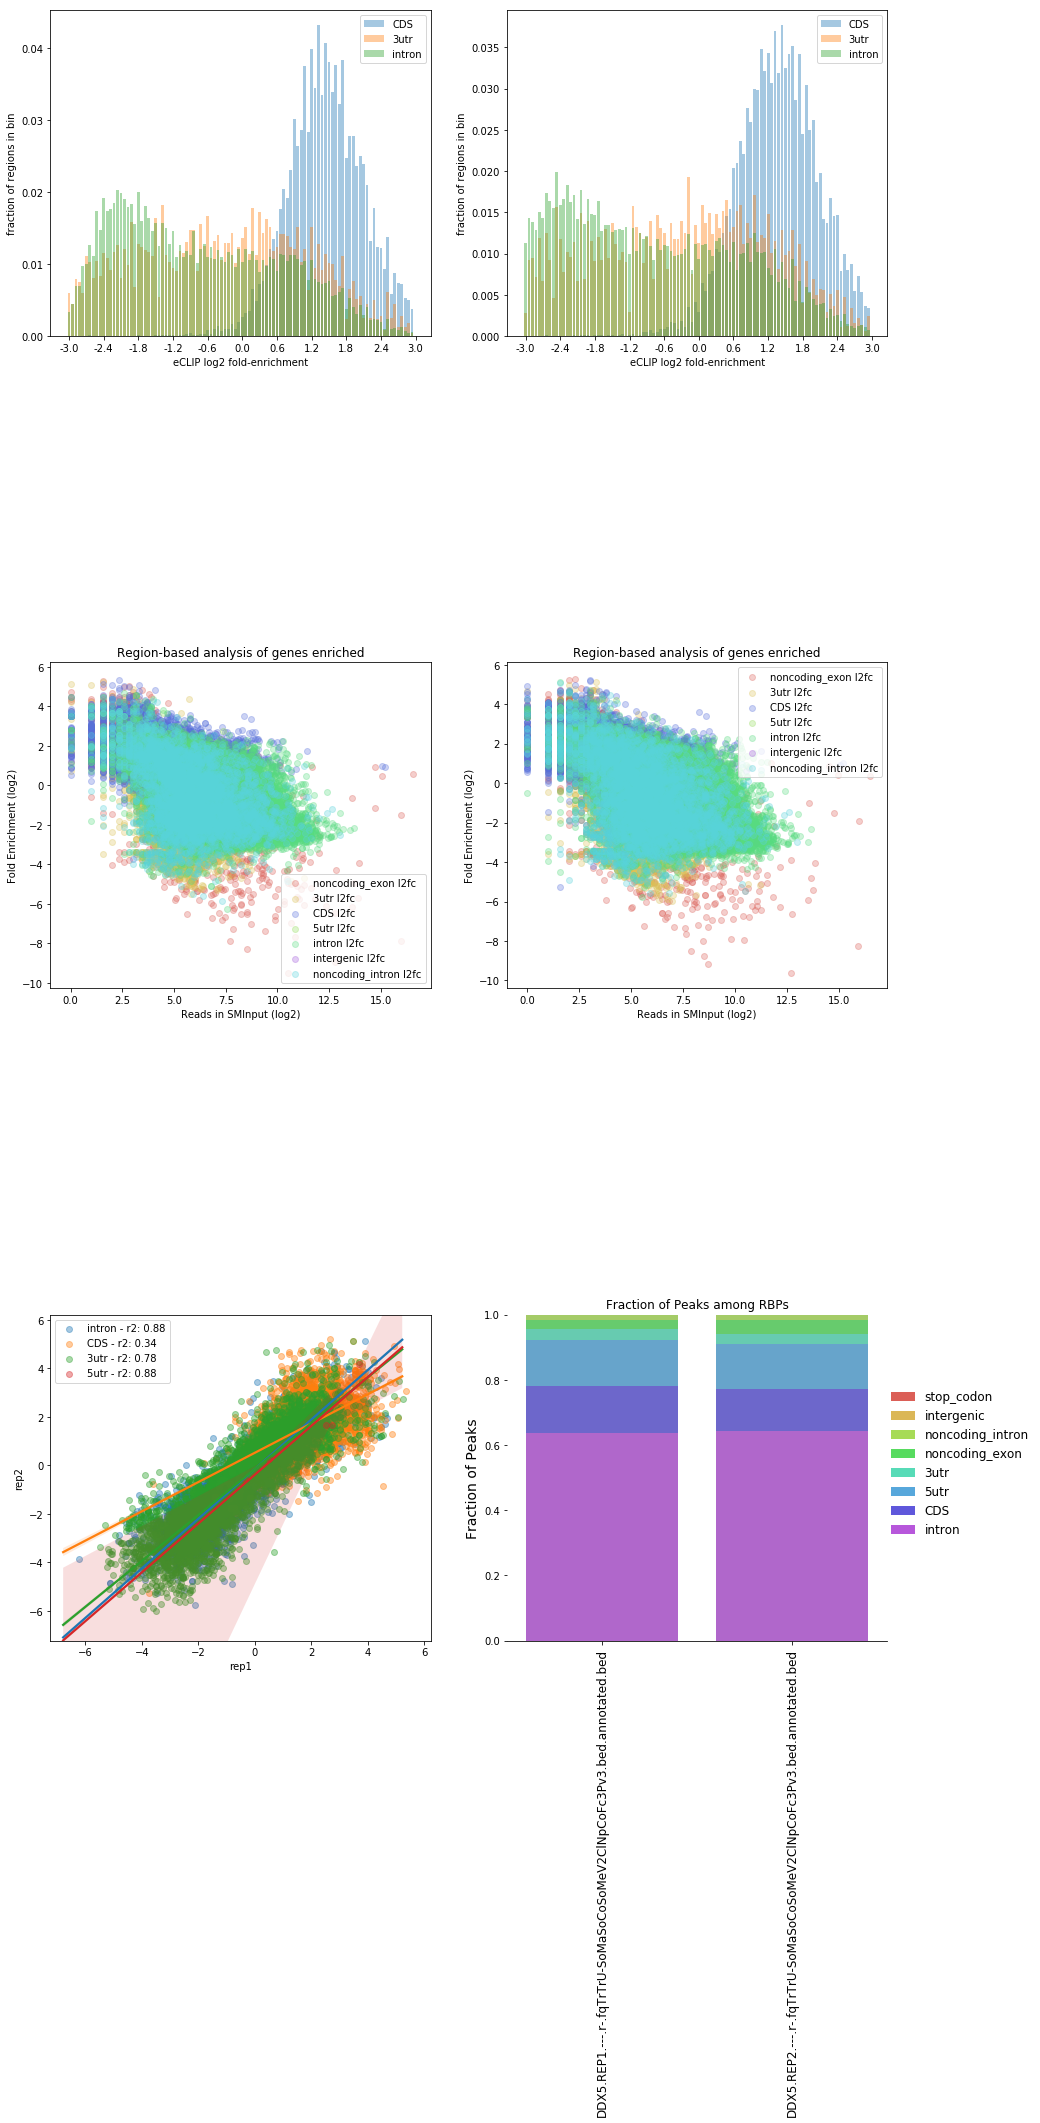

In [519]:
plot_all(
    l2fcwithpval_enr_r1, l2fcwithpval_enr_r2, 
    inp_reads_by_loc_r1, inp_reads_by_loc_r2,
    annotated_r1, annotated_r2
)

In [520]:
counts = get_counts([annotated_r1, annotated_r2])

In [521]:
counts

,DDX5.REP1.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed,DDX5.REP2.---.r-.fqTrTrU-SoMaSoCoSoMeV2ClNpCoFc3Pv3.bed.annotated.bed
intron,2729,3056
CDS,610,616
5utr,605,657
3utr,137,151
noncoding_exon,127,205
noncoding_intron,65,70
intergenic,3,3
stop_codon,1,2
